In [19]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

# Read in the Data
df = pd.read_csv(r'C:\Users\Dragon Slayer\Desktop\movies.csv')

In [20]:
# Lets Look at the Data
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [21]:
# Find Missing Data

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [22]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [23]:
# Change Data Type of Columns
df['budget'] = df['budget'].fillna(0).astype(np.int64)
df['gross'] = df['gross'].fillna(0).astype(np.int64)
df['votes'] = df['votes'].fillna(0).astype(np.int64)

In [24]:
#Practice Creating a Correct Year Cloumn
df['yearcorrect'] = df['released'].astype(str).str[-21:]
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score    votes         director  \
0        June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000     Harold Ramis   
...                                ...    ...      ...              ...   
7663  October 23, 2020 (United States)    3.1       18    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        0    James Randall   
7667   August 19, 2020 (United States)    5.7        7     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States         0   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0   

          gross                    company  runtime            yearcorrect  
0      46998772               Warner Bros.    146.0   1980 (United States)  
1      58853106          Columbia Pictures    104.0   1980 (United States)  
2     538375067                  Lucasfilm    124.0   1980 (United States)  
3      83453539         Paramount Pictures     88.0   1980 (United States)  
4      39846344             Orion Pictures     98.0   1980 (United States)  
...         ...                        ...      ...                    ...  
7663          0                        NaN     90.0   2020 (United States)  
7664          0  Cactus Blue Entertainment     90.0   2020 (United States)  
7665          0           Embi Productions      NaN  l 27, 2020 (Cameroon)  
7666          0                        NaN    120.0   2020 (United States)  
7667          0                PK 65 Films    102.0   2020 (United States)  

[7668 rows x 16 columns]

In [25]:
#Sort Gross Values in Descending Order
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [26]:
#Shows All Entries
pd.set_option('display.max_rows', None)

In [27]:
#Remove Duplicates for the "Comapny" Coulumn

df['company'].drop_duplicates().sort_values(ascending=True)

4345                      "DIA" Productions GmbH & Co. KG
7525                  "Weathering With You" Film Partners
3024                                      .406 Production
3748                                   1+2 Seisaku Iinkai
5813                                      10 West Studios
4054                                            120 Films
6975                                          120dB Films
3787                                       13 Productions
2929                                        1492 Pictures
385                                      1818 Productions
4412                                     19 Entertainment
7109                                           1978 Films
6517                     1984 Private Defense Contractors
2760                 1992 Number Four Limited Partnership
4151                                         2 Loop Films
7489                                    2.0 Entertainment
5195                                         2.4.7. Films
4559          

In [28]:
#Determine if Budget and Gross have a strong Correlation

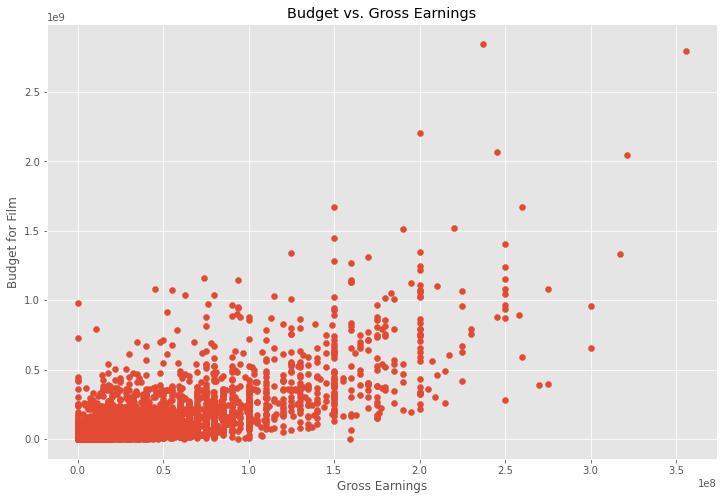

In [29]:
#Scatter Plot with Budget vs. Gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs. Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [30]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score    votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime            yearcorrect  
5445  2847246203  Twentieth Century Fox    162.0   2009 (United States)  
7445  2797501328         Marvel Studios    181.0   2019 (United States)  
3045  2201647264  Twentieth Century Fox    194.0   1997 (United States)  
6663  2069521700              Lucasfilm    138.0   2015 (United States)  
7244  2048359754         Marvel Studios    149.0   2018 (United States)

<AxesSubplot:xlabel='budget', ylabel='gross'>

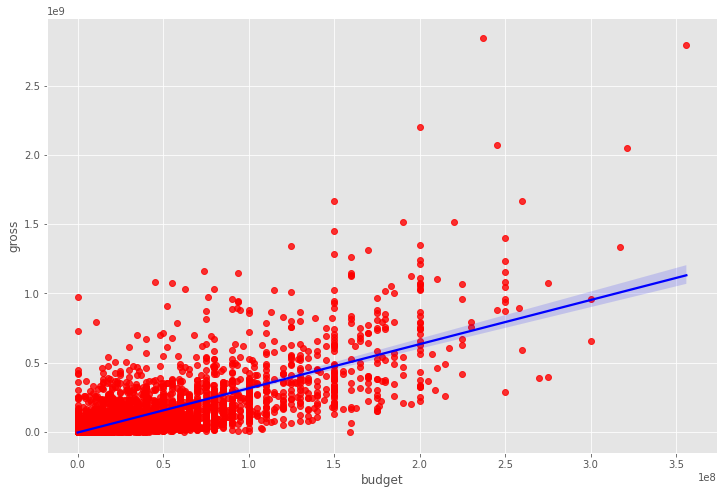

In [31]:
#Plot Budget vs. Gross with seaborn
sns.regplot(x='budget',y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [32]:
#Let's Start Looking at other possible correlation's

df.corr(method='pearson') #pearson, kendall,spearman

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222427  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222427  0.409182  1.000000  0.486931  0.632870  0.309122
budget   0.309212  0.055665  0.486931  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632870  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309122  0.269510  0.245235  1.000000

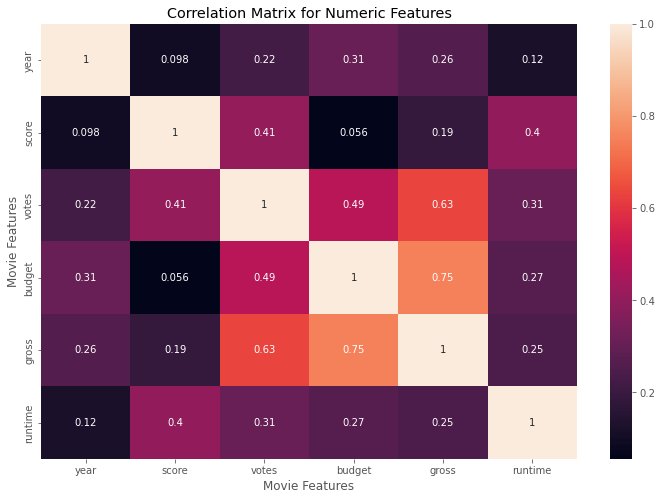

In [33]:
#Creating a Heatmap to make correlations easier to see
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [34]:
#Look at Company
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score    votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime            yearcorrect  
5445  2847246203  Twentieth Century Fox    162.0   2009 (United States)  
7445  2797501328         Marvel Studios    181.0   2019 (United States)  
3045  2201647264  Twentieth Century Fox    194.0   1997 (United States)  
6663  2069521700              Lucasfilm    138.0   2015 (United States)  
7244  2048359754         Marvel Studios    149.0   2018 (United States)

In [35]:
#Turning an object variable to unique categories specifically for the "company" column
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
       df_numerized[col_name] = df_numerized[col_name].astype('category')
       df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

name  rating  genre  year  released  score    votes  director  writer  \
5445   533       5      0  2009       696    7.8  1100000      1155    1778   
7445   535       5      0  2019       183    8.4   903000       162     743   
3045  6896       5      6  1997       704    7.8  1100000      1155    1778   
6663  5144       5      0  2015       698    7.8   876000      1125    2550   
7244   536       5      0  2018       192    8.4   897000       162     743   
7480  6194       4      2  2019      1488    6.9   222000      1455    1919   
6653  2969       5      0  2015      1704    7.0   593000       517    3568   
6043  5502       5      0  2012      2472    8.0  1300000      1517    2314   
6646  2145       5      0  2015       221    7.1   370000      1189     706   
7494  2131       4      2  2019      2676    6.8   148000       432    1950   
6644   534       5      0  2015      2235    7.3   777000      1517    2314   
7247   791       5      0  2018       959    7.3   661000      2457    3795   
5845  2407       5      1  2011      1445    8.1   790000       679    4052   
7075  5145       5      0  2017       661    7.0   581000      2282    3518   
7271  2970       5      0  2018      1799    6.2   277000      1121    1093   
6262  2130       4      2  2013      2715    7.4   585000       432    1950   
7072   657       4      7  2017      2022    7.1   283000       250    4000   
7281  2760       4      2  2018      1729    7.6   263000       303     491   
7055  5833       5      0  2017        61    6.6   214000       835    1431   
6244  2823       5      0  2013      2449    7.1   779000      2543    1174   
6688  3622       4      2  2015      1395    6.4   218000      1639     534   
6846  1056       5      0  2016      2488    7.8   694000       162     743   
7250   474       5      0  2018       748    6.9   404000      1189     990   
4245  6221       5      0  2003       680    8.9  1700000      2193    1745   
7458  5084       5      0  2019      1501    7.5   359000      1463     704   
7456  1061       5      0  2019      2213    6.8   478000       147     255   
5878  6968       5      0  2011      1870    6.2   390000      1886    1237   
6059  4951       5      0  2012      2804    7.7   642000      2476    3125   
6494  6967       5      0  2014      1849    5.6   302000      1886    1237   
2448  6194       1      2  1994      1811    8.5   970000      2415    1702   
6047  5726       5      0  2012      1510    8.4  1600000       483    2265   
7463  5141       5      0  2019       731    6.5   394000      1125     714   
7450  2930       6      5  2019      3062    8.4  1000000      2767    4248   
7488  6949       1      2  2019      1787    7.7   217000      1509    2158   
5685  6948       1      2  2010      1752    8.2   776000      1678    2158   
4852  4258       5      0  2006      1645    7.3   668000       996    4147   
6869  4616       5      0  2016       673    7.8   572000       912     717   
7481   290       4      1  2019      2394    6.9   239000      1031    2078   
5860  4261       5      0  2011      2350    6.6   492000      2341    4147   
7140  1552       4      2  2017      1896    6.3   119000      1639     758   
2245  2967       5      0  1993      1689    8.1   894000      2660    2931   
6908  1978       4      2  2016      1744    7.3   250000       124     215   
3451  5138       4      0  1999      2318    6.5   748000       963    1472   
5667   300       4      1  2010      2182    6.4   392000      2745    2607   
6863  7504       4      2  2016      2175    8.0   450000       362     576   
6045  6001       5      1  2012       651    7.8   773000      2193    1359   
3843  2412       4      1  2001      2593    7.6   685000       435    1741   
5243  5725       5      0  2008      1476    9.0  2400000       483    2265   
5652  2406       5      1  2010      2620    7.7   495000       679    4052   
6311  1551       4      2  2013      1599    7.3   37700

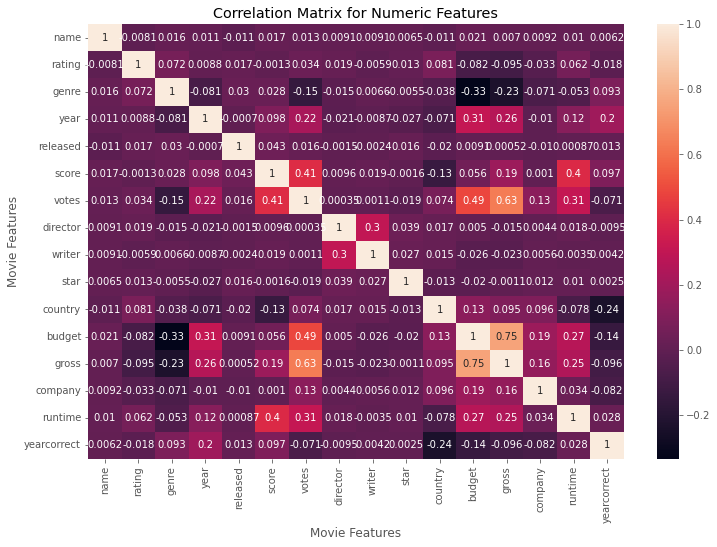

In [36]:
#Heatmap for all columns in data set to see more potential correlations
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [37]:
#Raw Data Correlation Matrix
df_numerized.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017097   
rating      -0.008069  1.000000  0.072423  0.008779  0.016613 -0.001314   
genre        0.016355  0.072423  1.000000 -0.081261  0.029822  0.027965   
year         0.011453  0.008779 -0.081261  1.000000 -0.000695  0.097995   
released    -0.011311  0.016613  0.029822 -0.000695  1.000000  0.042788   
score        0.017097 -0.001314  0.027965  0.097995  0.042788  1.000000   
votes        0.013038  0.033743 -0.145296  0.222427  0.015878  0.409182   
director     0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
writer       0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.019416   
star         0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.001609   
country     -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133348   
budget       0.020548 -0.081939 -0.334021  0.309212  0.009145  0.055665   
gross        0.006989 -0.095450 -0.234297  0.261900  0.000519  0.186392   
company      0.009211 -0.032943 -0.071067 -0.010431 -0.010474  0.001030   
runtime      0.010392  0.062145 -0.052711  0.120811  0.000868  0.399451   
yearcorrect  0.006229 -0.018345  0.092660  0.195334  0.013038  0.097019   

                votes  director    writer      star   country    budget  \
name         0.013038  0.009079  0.009081  0.006472 -0.010737  0.020548   
rating       0.033743  0.019483 -0.005921  0.013405  0.081244 -0.081939   
genre       -0.145296 -0.015258  0.006567 -0.005477 -0.037615 -0.334021   
year         0.222427 -0.020795 -0.008656 -0.027242 -0.070938  0.309212   
released     0.015878 -0.001478 -0.002404  0.015777 -0.020427  0.009145   
score        0.409182  0.009559  0.019416 -0.001609 -0.133348  0.055665   
votes        1.000000  0.000349  0.001127 -0.019146  0.073525  0.486931   
director     0.000349  1.000000  0.299067  0.039234  0.017490  0.004976   
writer       0.001127  0.299067  1.000000  0.027245  0.015343 -0.025911   
star        -0.019146  0.039234  0.027245  1.000000 -0.012998 -0.019952   
country      0.073525  0.017490  0.015343 -0.012998  1.000000  0.131720   
budget       0.486931  0.004976 -0.025911 -0.019952  0.131720  1.000000   
gross        0.632870 -0.014916 -0.022997 -0.001129  0.095325  0.750157   
company      0.133457  0.004404  0.005646  0.012442  0.095548  0.186474   
runtime      0.309122  0.017624 -0.003511  0.010174 -0.078412  0.269510   
yearcorrect -0.071104 -0.009521  0.004168  0.002516 -0.239070 -0.136487   

                gross   company   runtime  yearcorrect  
name         0.006989  0.009211  0.010392     0.006229  
rating      -0.095450 -0.032943  0.062145    -0.018345  
genre       -0.234297 -0.071067 -0.052711     0.092660  
year         0.261900 -0.010431  0.120811     0.195334  
released     0.000519 -0.010474  0.000868     0.013038  
score        0.186392  0.001030  0.399451     0.097019  
votes        0.632870  0.133457  0.309122    -0.071104  
director    -0.014916  0.004404  0.017624    -0.009521  
writer      -0.022997  0.005646 -0.003511     0.004168  
star        -0.001129  0.012442  0.010174     0.002516  
country      0.095325  0.095548 -0.078412    -0.239070  
budget       0.750157  0.186474  0.269510    -0.136487  
gross        1.000000  0.156745  0.245235    -0.096024  
company      0.156745  1.000000  0.034402    -0.082256  
runtime      0.245235  0.034402  1.000000     0.028118  
yearcorrect -0.096024 -0.082256  0.028118     1.000000

In [38]:
#Formatting a Correlation Matrix 1
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.017097
             votes          0.013038
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009211
             runtime        0.010392
             yearcorrect    0.006229
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score         -0.001314
             votes          0.033743
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [39]:
#Formatting a Correlation Matrix 2
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget       genre         -0.334021
genre        budget        -0.334021
yearcorrect  country       -0.239070
country      yearcorrect   -0.239070
genre        gross         -0.234297
gross        genre         -0.234297
genre        votes         -0.145296
votes        genre         -0.145296
budget       yearcorrect   -0.136487
yearcorrect  budget        -0.136487
score        country       -0.133348
country      score         -0.133348
yearcorrect  gross         -0.096024
gross        yearcorrect   -0.096024
rating       gross         -0.095450
gross        rating        -0.095450
company      yearcorrect   -0.082256
yearcorrect  company       -0.082256
rating       budget        -0.081939
budget       rating        -0.081939
year         genre         -0.081261
genre        year          -0.081261
country      runtime       -0.078412
runtime      country       -0.078412
votes        yearcorrect   -0.071104
yearcorrect  votes         -0.071104
company      genre         -0.071067
g

In [50]:
#Formatting a Correlation Matrix 3
high_corr = sorted_pairs[(sorted_pairs) > 0.5].sort_values()
high_corr

#df = df.sort_values(by=['gross'], inplace=False, ascending=False)

votes        gross          0.632870
gross        votes          0.632870
budget       gross          0.750157
gross        budget         0.750157
rating       rating         1.000000
genre        genre          1.000000
year         year           1.000000
released     released       1.000000
score        score          1.000000
votes        votes          1.000000
director     director       1.000000
star         star           1.000000
runtime      runtime        1.000000
country      country        1.000000
budget       budget         1.000000
gross        gross          1.000000
company      company        1.000000
name         name           1.000000
writer       writer         1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [41]:
#Votes and Budget also have a High Correlation to Gross Earnings